# Proyect Spaceship Titanic

## Data Base: https://www.kaggle.com/competitions/spaceship-titanic/overview
## Descriptions:
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Inspect Data:

In [1]:
# Inspect data modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay
import missingno
import seaborn as sns

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.shape, test_df.shape

((8693, 14), (4277, 13))

In [5]:
display(train_df.isna().sum(), test_df.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

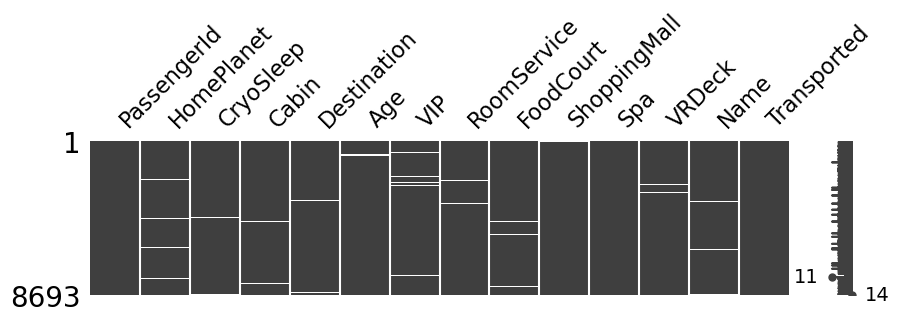

In [6]:
missingno.matrix(train_df, figsize=(10,2));

In [7]:
train_df['CryoSleep'] = train_df['CryoSleep'].replace({True: 1, False: 0})
train_df['VIP'] = train_df['VIP'].replace({True: 1, False: 0})
train_df['Transported'] = train_df['Transported'].replace({True: 1, False: 0})

In [8]:
display('Train'.center(80), train_df.describe().T.style.background_gradient(cmap = "magma"), 'test'.center(80), test_df.describe().T.style.background_gradient(cmap = "magma"))

'                                     Train                                      '

,count,mean,std,min,25%,50%,75%,max
CryoSleep,8476.000000,0.358306,0.479531,0.000000,0.000000,0.000000,1.000000,1.000000
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000
VIP,8490.000000,0.023439,0.151303,0.000000,0.000000,0.000000,0.000000,1.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Transported,8693.000000,0.503624,0.500016,0.000000,0.000000,1.000000,1.000000,1.000000


'                                      test                                      '

,count,mean,std,min,25%,50%,75%,max
Age,4186.000000,28.658146,14.179072,0.000000,19.000000,26.000000,37.000000,79.000000
RoomService,4195.000000,219.266269,607.011289,0.000000,0.000000,0.000000,53.000000,11567.000000
FoodCourt,4171.000000,439.484296,1527.663045,0.000000,0.000000,0.000000,78.000000,25273.000000
ShoppingMall,4179.000000,177.295525,560.821123,0.000000,0.000000,0.000000,33.000000,8292.000000
Spa,4176.000000,303.052443,1117.186015,0.000000,0.000000,0.000000,50.000000,19844.000000
VRDeck,4197.000000,310.710031,1246.994742,0.000000,0.000000,0.000000,36.000000,22272.000000


#### We can see that in the spent money features, there is a separation between low and high prices 
* So let's inspect RoomService, FoodCourt, ShoppingMall, Spa and VRDeck

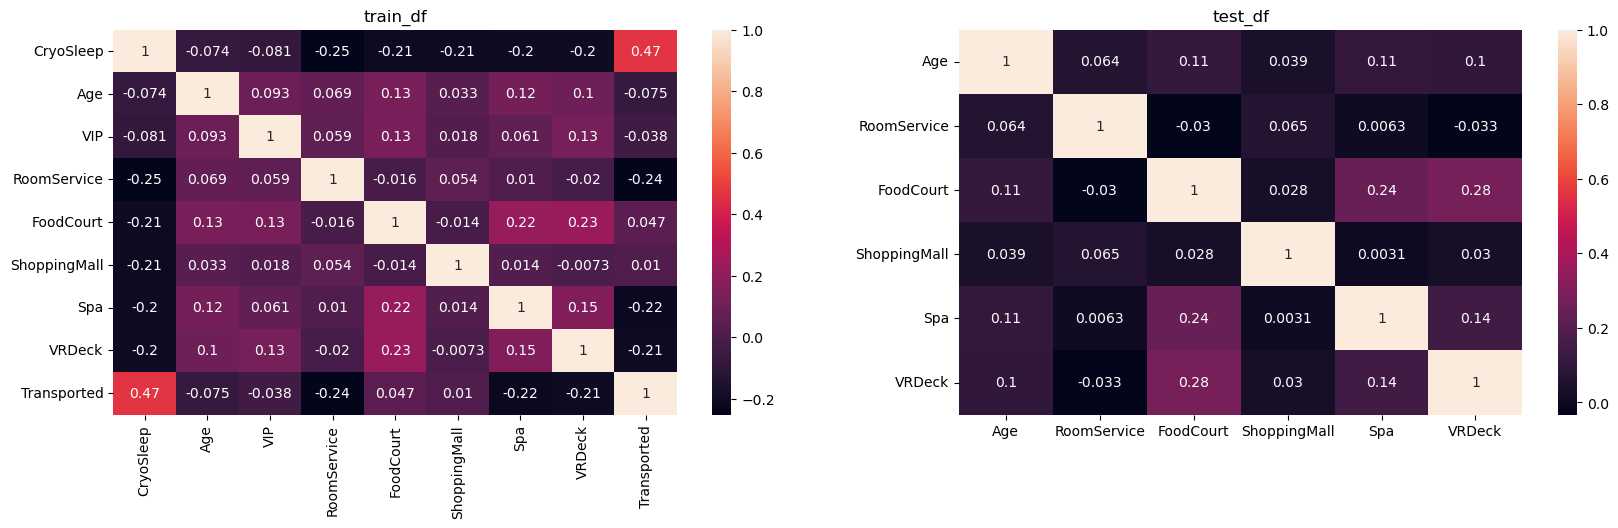

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
train_cm = train_df.corr(numeric_only=True) 
ax1 = sns.heatmap(ax=axes[0], data=train_cm, annot=True)
ax1.set(title='train_df')

test_cm = test_df.corr(numeric_only=True)
ax2 = sns.heatmap(ax=axes[1], data=test_cm, annot=True)
ax2.set(title='test_df')

plt.show()

## We can see the exist a correlation between the Transported and (VRDeck, Spa, RoomService)
* Let's explore this features

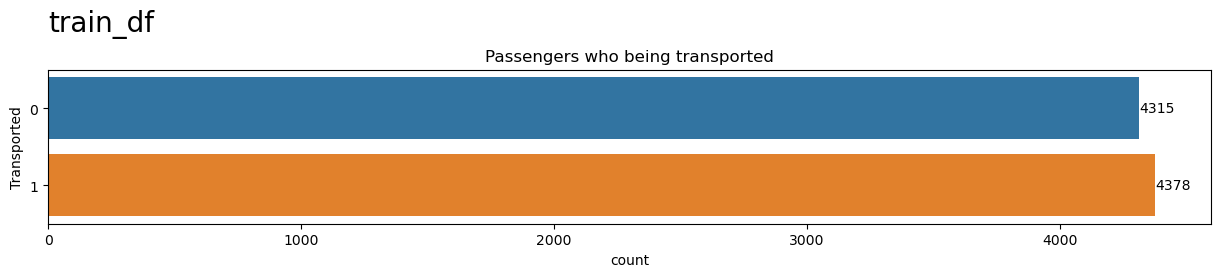

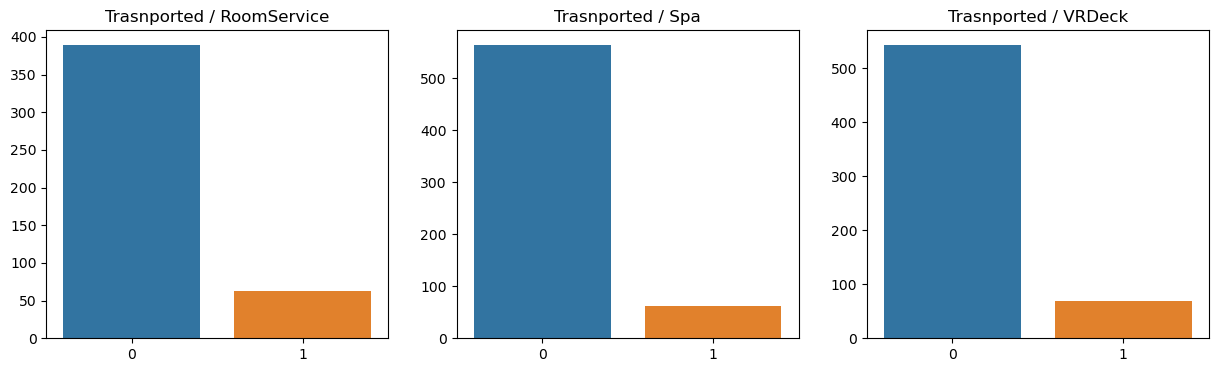

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 2))
counts_trans = train_df['Transported'].value_counts().rename_axis('Transported').reset_index(name='count')
ax1 = sns.barplot(ax=axes, data=counts_trans, x='count', y='Transported', orient='h')
ax1.bar_label(container=ax1.containers[0])
ax1.set_title('Passengers who being transported')

plt.text(x=0, y=-1, s="train_df", fontsize=20, color='black')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
labels = ['RoomService', 'Spa', 'VRDeck']
for i in range(len(labels)):
    ax = sns.barplot(ax=axes[i], data=train_df, x='Transported', y=labels[i], errorbar=None)
    ax.set(title=f'Trasnported / {labels[i]}', ylabel='', xlabel='')
plt.show();

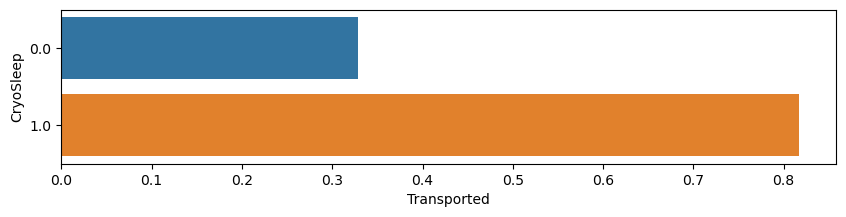

Total CryoSleep: 3037
CryoSleep and Transported: 2483 - 81.76%


In [11]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,2))
ax = sns.barplot(data=train_df, x='Transported', y='CryoSleep', orient='h', errorbar=None)
plt.show()
count = 0
for n in range(len(train_df)):
    if train_df.iloc[n]['CryoSleep'] == 1 and train_df.iloc[n]['Transported'] == 1:
        count += 1

cryo_tran_percent = count * 100 / train_df['CryoSleep'].where(train_df['CryoSleep']== 1).count()        
print(f"Total CryoSleep: {train_df['CryoSleep'].where(train_df['CryoSleep'] == 1).count()}")
print(f"CryoSleep and Transported: {count} - {cryo_tran_percent:.2f}%")

#### Where CryoSleep == True there are a lot of possibilities of being Transported

In [12]:
# For count the groups size ej.: 0003_04 -> group 3 , group_size 4

train_df[["Group", "Group_Size"]] = train_df["PassengerId"].str.split('_', expand=True)
train_df["Group_Size"] = train_df["Group"].map(lambda x: train_df["Group"].value_counts(ascending=True)[x])

test_df[["Group", "Group_Size"]] = test_df["PassengerId"].str.split('_', expand=True)
test_df["Group_Size"] = test_df["Group"].map(lambda x: test_df["Group"].value_counts(ascending=True)[x])

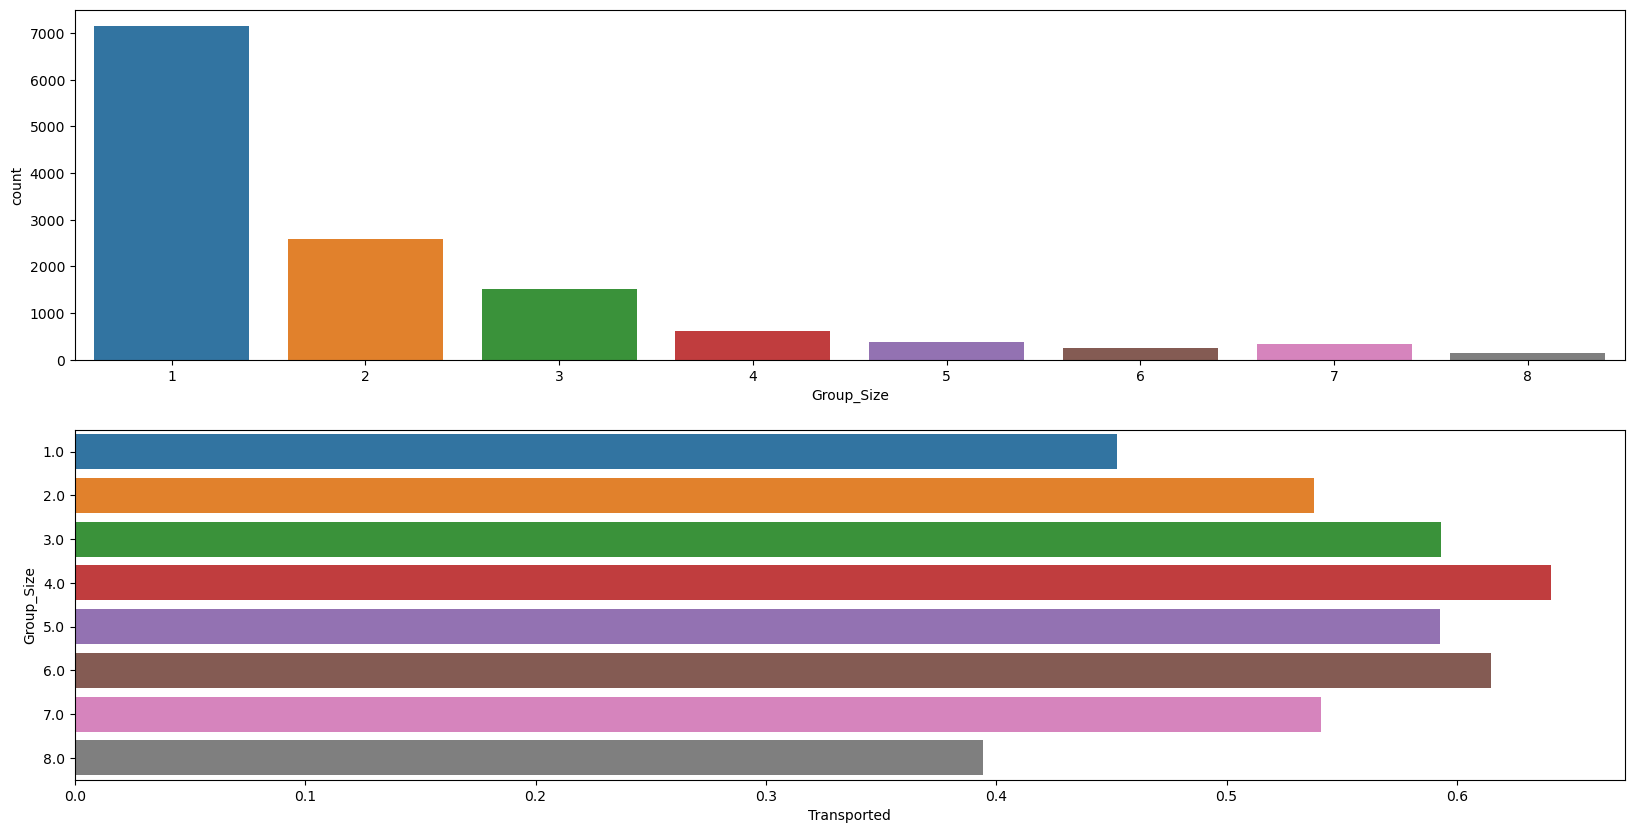

In [13]:
temp_df = train_df[['Group_Size', 'Transported']].groupby(train_df['Group_Size']).agg('mean').sort_values('Transported').reset_index(drop=True)
concat_df = pd.concat([train_df, test_df])
counts_group_size = concat_df['Group_Size'].value_counts().rename_axis('Group_Size').reset_index(name='count')

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(20, 10))
ax1 = sns.barplot(ax=axes[0], orient='v', data=counts_group_size, x='Group_Size', y='count')
ax2 = sns.barplot(ax=axes[1], orient='h', data=temp_df, x='Transported', y='Group_Size')


#### We can see that the group 1 are the biggest but less than 50% of the group are transported

## Now let's explore the Homeplanet and Destination

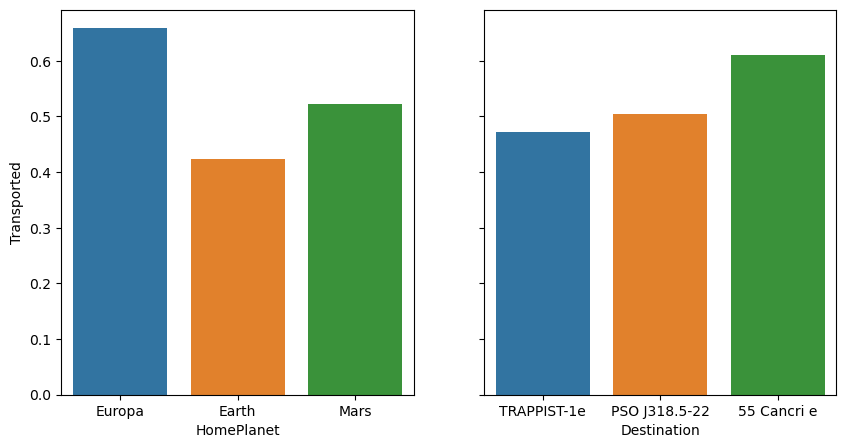

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
ax1 = sns.barplot(ax=axes[0], data=train_df, y='Transported', x='HomePlanet', orient='v', errorbar=None)
ax2 = sns.barplot(ax=axes[1], data=train_df, y='Transported', x='Destination', orient='v', errorbar=None)
ax2.set(ylabel='')
plt.show()

### From Europa and destination to 55 Cancri passengers have more chances to being Transported
* Let's see the numbers from both

In [15]:
def compare_columns(title, col, col_val, col_to_com, col_to_com_val):
    col_total = col.count()
    col_val_total = col.where(col == col_val).count()
    count = 0
    for n in range(len(col)):
        if col.iloc[n] == col_val and col_to_com.iloc[n] == col_to_com_val:
            count += 1
    percent_col_val = count * 100 / col_val_total
    percent_col = count * 100 / col_total
    print(f'\033[1m{title}\033[0m\n')
    print(f'{col.name} Total -> {col_total}')
    print(f'{col_val} Total -> {col_val_total}')
    print(f'{col.name} = {col_val} and {col_to_com.name} = {col_to_com_val}:')
    print(f'\t* Total: {count} ')
    print(f'\t* {col_val} percent: {percent_col_val:.2f}%')
    print(f'\t* {col.name} percent: {percent_col:.2f}%')

In [16]:
train_df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [17]:
compare_columns('Passenger from Europa and Transported',
                train_df['HomePlanet'], 'Europa',
                train_df['Transported'], 1)

compare_columns('Passenger destination 55 Cancri e and Transported',
                train_df['Destination'], '55 Cancri e',
                train_df['Transported'], 1)

Passenger from Europa and Transported

HomePlanet Total -> 8492
Europa Total -> 2131
HomePlanet = Europa and Transported = 1:
	* Total: 1404 
	* Europa percent: 65.88%
	* HomePlanet percent: 16.53%
Passenger destination 55 Cancri e and Transported

Destination Total -> 8511
55 Cancri e Total -> 1800
Destination = 55 Cancri e and Transported = 1:
	* Total: 1098 
	* 55 Cancri e percent: 61.00%
	* Destination percent: 12.90%


In [18]:
temp_df = train_df.loc[(train_df['HomePlanet'] == 'Europa') & (train_df['Destination'] == '55 Cancri e')]
temp_df = temp_df[['HomePlanet', 'Destination', 'Transported']]
temp_df.head()

,HomePlanet,Destination,Transported
9,Europa,55 Cancri e,1
11,Europa,55 Cancri e,1
30,Europa,55 Cancri e,0
36,Europa,55 Cancri e,1
108,Europa,55 Cancri e,1


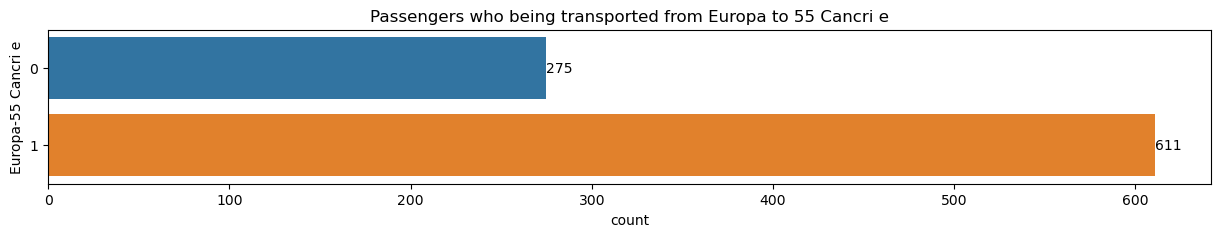

Percent: 68.96%


In [19]:
planet_dest = temp_df['Transported'].value_counts().rename_axis('Europa-55 Cancri e').reset_index(name='count')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 2))
ax1 = sns.barplot(ax=axes, data=planet_dest, x='count', y='Europa-55 Cancri e', orient='h')
ax1.bar_label(container=ax1.containers[0])
ax1.set_title('Passengers who being transported from Europa to 55 Cancri e')
plt.show()

percent = planet_dest['count'].loc[(planet_dest['Europa-55 Cancri e'] == 1)].sum() * 100 / planet_dest['count'].sum()
print(f'Percent: {percent:.2f}%')

#### We can confirm that the number of passengers from Europe to the destination 55 Cancri e who are transported is significantly higher (68.96%)

### Let's explore VIP, FoodCourt and ShoppingMall!

In [102]:
temp_df = train_df[['VIP', 'Transported']]
temp_df.head()

,VIP,Transported
0,0.0,0
1,0.0,1
2,1.0,0
3,0.0,0
4,0.0,1


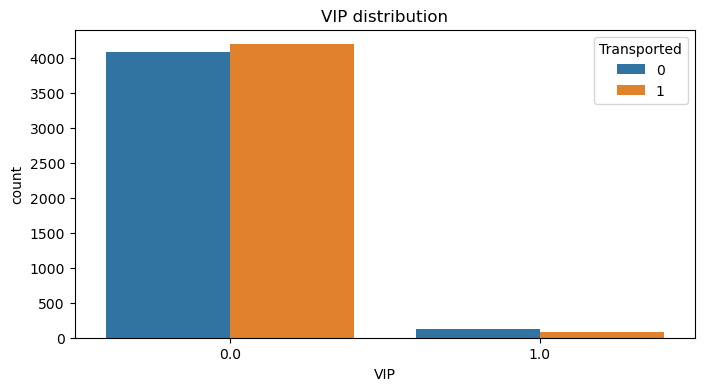

VIP and Transported

VIP Total -> 8490
1 Total -> 199
VIP = 1 and Transported = 1:
	* Total: 76 
	* 1 percent: 38.19%
	* VIP percent: 0.90%
No VIP and Transported

VIP Total -> 8490
0 Total -> 8291
VIP = 0 and Transported = 1:
	* Total: 4198 
	* 0 percent: 50.63%
	* VIP percent: 49.45%


In [103]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,4))
ax1 = sns.countplot(data=temp_df, x='VIP', hue='Transported')
ax1.set(title='VIP distribution')
plt.show()
compare_columns('VIP and Transported',
                temp_df['VIP'], 1,
                temp_df['Transported'], 1)
compare_columns('No VIP and Transported',
                temp_df['VIP'], 0,
                temp_df['Transported'], 1)

#### So we can see than there are only 0.90% of VIPs, but they have 38.19% of being Transported

In [200]:
train_df['Group_Size'].loc[train_df['FoodCourt'] < train_df['FoodCourt'].mean()].value_counts()

1    3944
2    1312
3     849
4     318
5     206
7     197
6     142
8      89
Name: Group_Size, dtype: int64

In [201]:
train_df['Group_Size'].loc[train_df['ShoppingMall'] < train_df['FoodCourt'].mean()].value_counts()

1    4012
2    1445
3     907
4     378
5     241
7     200
6     166
8      88
Name: Group_Size, dtype: int64

In [169]:
temp_df = train_df[['FoodCourt', 'ShoppingMall', 'Transported', 'Group_Size']]
temp_df.head()

,FoodCourt,ShoppingMall,Transported,Group_Size
0,0.0,0.0,0,1
1,9.0,25.0,1,1
2,3576.0,0.0,0,2
3,1283.0,371.0,0,2
4,70.0,151.0,1,1


In [202]:
temp_df['FoodCourt'].describe()

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

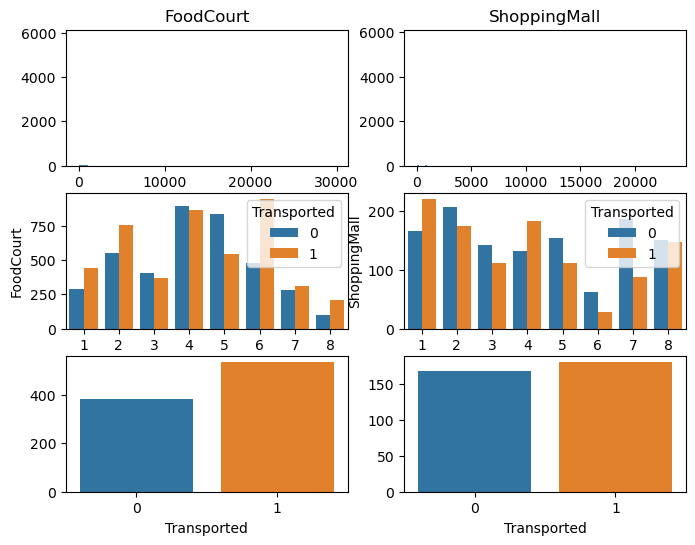

In [210]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(8, 6))
temp_l = ['FoodCourt', 'ShoppingMall']
for x in range(len(temp_l)):
    ax1 = sns.histplot(ax=axes[0][x], data=temp_df, x=temp_l[x], stat='count')
    ax1.set(title=temp_l[x], xlabel='', ylabel='')
    ax2 = sns.barplot(ax=axes[1][x], data=temp_df, x='Group_Size', y=temp_l[x], hue='Transported', errorbar=None)
    #ax2.set(ylabel='')
    ax3 = sns.barplot(ax=axes[2][x], data=temp_df, x='Transported', y=temp_l[x], errorbar=None)
    ax3.set(ylabel='')
plt.show()

In [99]:
temp_df.describe().transpose()[['count', 'mean', 'min', 'max']]

,count,mean,min,max
VIP,8490.0,0.023439,0.0,1.0
FoodCourt,8510.0,458.077203,0.0,29813.0
ShoppingMall,8485.0,173.729169,0.0,23492.0
Transported,8693.0,0.503624,0.0,1.0


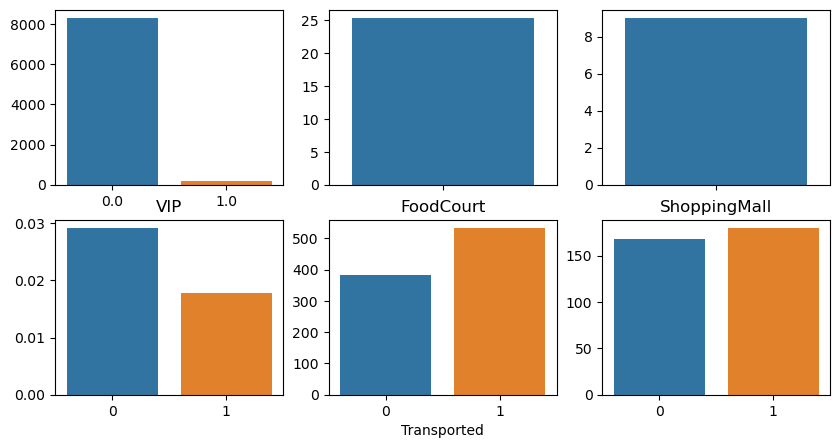

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,5))
temp_l = temp_df.columns[:-1]
for x in range(len(temp_l)):
        if temp_l[x] == 'VIP':
            ax = sns.countplot(ax=axes[0][x], data=temp_df, x=temp_l[x])
        else:
            ax = sns.barplot(ax=axes[0][x], data=temp_df.describe().transpose()[['25%', '50%', '75%']].transpose(), y=temp_l[x], orient='v', errorbar=None)
        ax.set(xlabel='', ylabel='')
for x in range(len(temp_l)):
    ax = sns.barplot(ax=axes[1][x], data=temp_df, x='Transported', y=temp_l[x], errorbar=None)
    if x != 1:
        ax.set(xlabel='', ylabel='', title=temp_l[x])
    elif x == 1:
        ax.set(ylabel='', title=temp_l[x])
plt.show()

In [79]:
temp_df = train_df.groupby('Transported').aggregate({'FoodCourt': 'count', 'ShoppingMall': 'count', 'VIP': 'count'})
temp_df.reset_index()

,Transported,FoodCourt,ShoppingMall,VIP
0,0,4231,4221,4216
1,1,4279,4264,4274


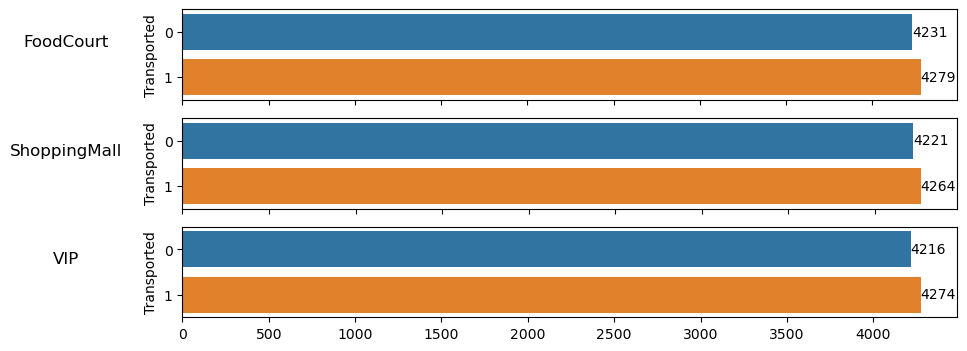

In [171]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(10,4), sharey=True)
temp_l = temp_df.columns[1:]
for x in range(len(temp_l)):
    ax = sns.barplot(ax=axes[x], data=temp_df, y='Transported', x=temp_l[x], orient='h')
    if x < 2:
        ax.set(xticklabels='')
    ax.set_title(temp_l[x], x=-0.15, y=0.5)
    ax.set(xlabel='')
    ax.bar_label(container=ax.containers[0])   

plt.show()

#### We can see that there is no much different between the values and if Transported or not

In [175]:
train_df['Cabin'].head() # deck/num/side, where side can be either P for Port or S for Starboard.

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [311]:
cabin_deck = train_df['Cabin'].str.split('/', expand=True)[0]
cabin_num = train_df['Cabin'].str.split('/', expand=True)[1]
cabin_side = train_df['Cabin'].str.split('/', expand=True)[2]
temp_df = pd.DataFrame({'cabin_deck': cabin_deck, 'cabin_num': cabin_num, 'cabin_side': cabin_side})
temp_df.head()

,cabin_deck,cabin_num,cabin_side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [312]:
print(f"len cabin_deck: {len(temp_df['cabin_deck'].unique())}")
print(f"len cabin_num: {len(temp_df['cabin_num'].unique())}")
print(f"len cabin_side: {len(temp_df['cabin_side'].unique())}")

len cabin_deck: 9
len cabin_num: 1818
len cabin_side: 3


#### Drop cabin_num because the len is to big and dont contribute to much

In [313]:
temp_df = temp_df.drop('cabin_num', axis=1)
temp_df['Transported'] = train_df['Transported']
temp_df.head()

,cabin_deck,cabin_side,Transported
0,B,P,0
1,F,S,1
2,A,S,0
3,A,S,0
4,F,S,1


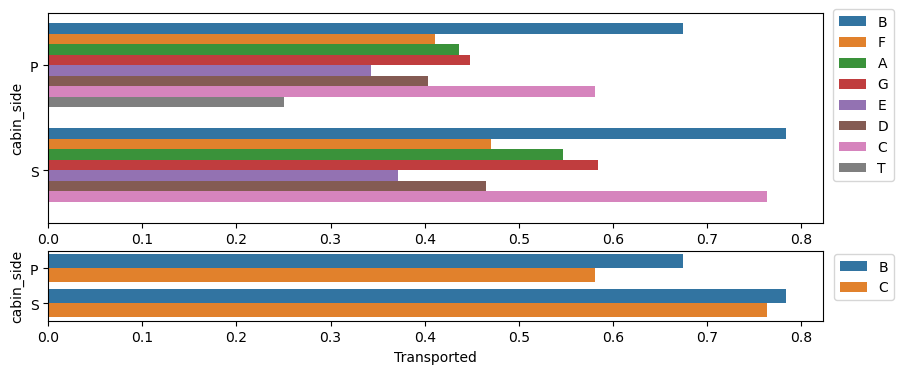

In [314]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(10,4), sharey=True, gridspec_kw={'height_ratios': [3,1]})
ax1 = sns.barplot(ax=axes[0], data=temp_df, x='Transported', y='cabin_side', hue='cabin_deck', orient='h', errorbar=None)
ax1.legend(bbox_to_anchor=(1.1, 1.05))

# Take off Cabin B and C, who has the most probabilities to being Transported
temp_df = temp_df.loc[(temp_df['cabin_deck'] == 'B') | (temp_df['cabin_deck'] == 'C')]
ax2 = sns.barplot(ax=axes[1], data=temp_df, x='Transported', y='cabin_side', hue='cabin_deck', orient='h', errorbar=None)
ax2.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [315]:
compare_columns('Cabin B and Transported',
                temp_df['cabin_deck'], 'B',
                temp_df['Transported'], 1)

compare_columns('Cabin C and Transported',
                temp_df['cabin_deck'], 'C',
                temp_df['Transported'], 1)

Cabin B and Transported

cabin_deck Total -> 1526
B Total -> 779
cabin_deck = B and Transported = 1:
	* Total: 572 
	* B percent: 73.43%
	* cabin_deck percent: 37.48%
Cabin C and Transported

cabin_deck Total -> 1526
C Total -> 747
cabin_deck = C and Transported = 1:
	* Total: 508 
	* C percent: 68.01%
	* cabin_deck percent: 33.29%


In [323]:
# Probability of goes in Cabin B or C and being Transported
cabin_BC = temp_df['Transported'].value_counts().rename_axis('cabin_BC').reset_index(name='count')
percent = cabin_BC['count'].loc[(cabin_BC['cabin_BC'] == 1)].sum() * 100 / cabin_BC['count'].sum()
print(f"percent of goes in Cabin B or C and being Transported {percent:.2f}%")

percent of being in Cabin B or C and being Transported 70.77%


### So we can see if the Passenger goes in the Cabin B or C, has 70.77% of posibilities of being Transported

## Until now, we can see that this are the best features correlations for being Transported:
* Passengers CryoSleep have +80%
* Passengers who waste low money on RoomService, Spa or VRDeck
* Passengers in groups 2 to 7 have more than 50%
* Passengers in groups 3 to 6 have almost more than 60%
* Passengers from Europe and destination 55 Cancri e have 68.96%
* Passengers who go in Cabin B or C have 70.77%

# Let's clean and group the data

In [172]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Group_Size
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,1
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,2
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,2
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,1


### Steps to clean the data:
* Drop -> PassengerId / VIP / FoodCourt / ShoppingMall / Name
* Transform -> HomePlanet / Destination / Group / Cabin

In [174]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep       float64
Cabin            object
Destination      object
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
Group            object
Group_Size        int64
dtype: object

In [14]:
def group_columns(df, cols_to_group):
    for col in cols_to_group:
        for row in df[col]:
            print(row)

group_columns(train_df.head(), ['Name', 'Spa'])

Maham Ofracculy
Juanna Vines
Altark Susent
Solam Susent
Willy Santantines
0.0
549.0
6715.0
3329.0
565.0
